<a href="https://colab.research.google.com/github/Arslanbaig84/eda/blob/main/EDA_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('http://www.ishelp.info/data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.age.count()

1338

In [7]:
print(f'age: {df.age.nunique()}')
print(f'sex: {df.sex.nunique()}')
print(f'bmi: {df.bmi.nunique()}')
print(f'children: {df.children.nunique()}')
print(f'smoker: {df.smoker.nunique()}')
print(f'region: {df.region.nunique()}')
print(f'charges: {df.charges.nunique()}')

age: 47
sex: 2
bmi: 548
children: 6
smoker: 2
region: 4
charges: 1337


In [8]:
print(f'age: {df.age.dtype}')
print(f'sex: {df.sex.dtype}')
print(f'bmi: {df.bmi.dtype}')
print(f'children: {df.children.dtype}')
print(f'smoker: {df.smoker.dtype}')
print(f'region: {df.region.dtype}')
print(f'charges: {df.charges.dtype}')

age: int64
sex: object
bmi: float64
children: int64
smoker: object
region: object
charges: float64


In [9]:
print(f'age: {pd.api.types.is_numeric_dtype(df.age)}')
print(f'sex: {pd.api.types.is_numeric_dtype(df.sex)}')
print(f'bmi: {pd.api.types.is_numeric_dtype(df.bmi)}')
print(f'children: {pd.api.types.is_numeric_dtype(df.children)}')
print(f'smoker: {pd.api.types.is_numeric_dtype(df.smoker)}')
print(f'region: {pd.api.types.is_numeric_dtype(df.region)}')
print(f'charges: {pd.api.types.is_numeric_dtype(df.charges)}')

age: True
sex: False
bmi: True
children: True
smoker: False
region: False
charges: True


In [10]:
print(f'age: {df.age.isnull().sum()}')
print(f'sex: {df.sex.isnull().sum()}')
print(f'bmi: {df.bmi.isnull().sum()}')
print(f'children: {df.children.isnull().sum()}')
print(f'smoker: {df.smoker.isnull().sum()}')
print(f'region: {df.region.isnull().sum()}')
print(f'charges: {df.charges.isnull().sum()}')

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


In [11]:
import numpy as np

In [12]:
print(df.charges.min())
print(df.charges.max())
print(df.charges.quantile(0.25))
print(df.charges.quantile(0.50))
print(df.charges.quantile(0.75))
print(df.charges.mean())
print(df.charges.median())
print(df.charges.mode())
print(df.charges.mode().values[0])

1121.8739
63770.42801
4740.28715
9382.033
16639.912515
13270.422265141257
9382.033
0    1639.5631
Name: charges, dtype: float64
1639.5631


In [13]:
df.charges.std()

12110.011236693994

In [14]:
np.std(df.charges)

12105.484975561605

In [15]:
np.std(df.charges, ddof=1)

12110.011236693994

In [16]:
from scipy.stats import kurtosis, skew
print(skew(df.charges, bias=False))
print(kurtosis(df.charges, bias=False))

1.5158796580240383
1.6062986532967916


In [17]:
print(df.charges.skew())

1.5158796580240388


In [18]:
print(df.charges.kurtosis())

1.6062986532967907


Bivariate Analysis


In [19]:
np.corrcoef(df['age'], df['charges'])[0][1]

0.29900819333064754

In [20]:
np.corrcoef(df['bmi'], df['charges'])[0][1]

0.19834096883362895

In [21]:
np.corrcoef(df['children'], df['charges'])[0][1]

0.0679982268479048

In [22]:
print(df.charges.corr(df.age))
print(df.charges.corr(df.bmi))
print(df.charges.corr(df.children))

0.2990081933306476
0.19834096883362895
0.06799822684790478


In [23]:
from scipy import stats

In [24]:
corr = stats.pearsonr(df.charges, df.age)
print(corr)

PearsonRResult(statistic=0.2990081933306476, pvalue=4.886693331718192e-29)


In [25]:
r, p = stats.pearsonr(df.charges, df.bmi)
print(r)
print(p)

0.1983409688336288
2.459085535116766e-13


In [26]:
r, p = stats.pearsonr(df.charges, df.children)
print(f'r:{r}, p:{p}')

r:0.0679982268479048, p:0.01285212852013651


In [27]:
corr_df = pd.DataFrame(columns=['r', 'p'])
for col in df:
  if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
    r, p =stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r,3), round(p,3)]
corr_df

,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


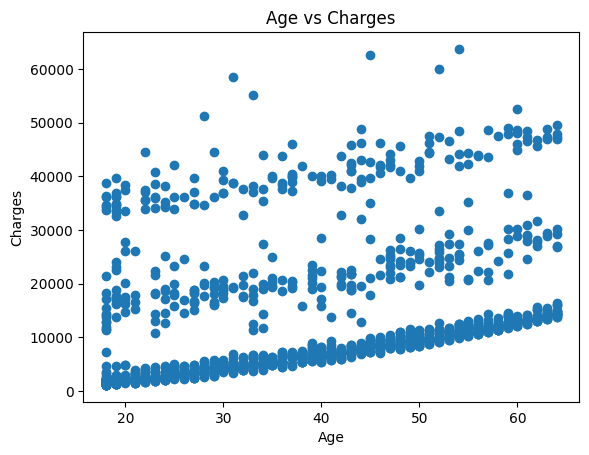

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df.age, df.charges)
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


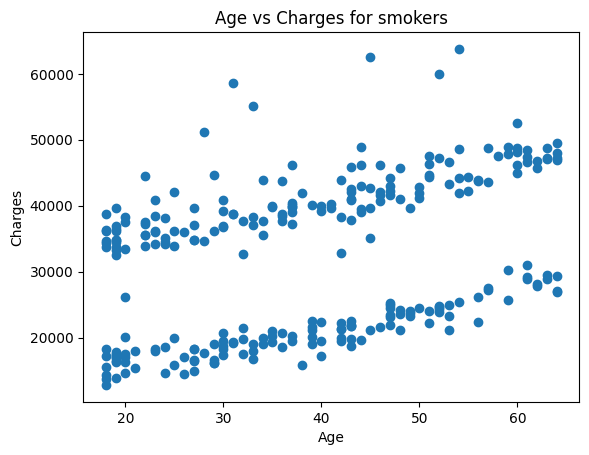

In [29]:

df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']
plt.scatter(df_smoker.age, df_smoker.charges)
plt.title('Age vs Charges for smokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


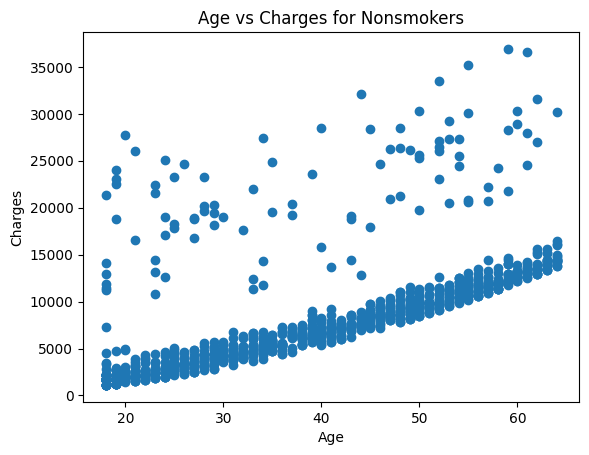

In [30]:
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges)
plt.title('Age vs Charges for Nonsmokers')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


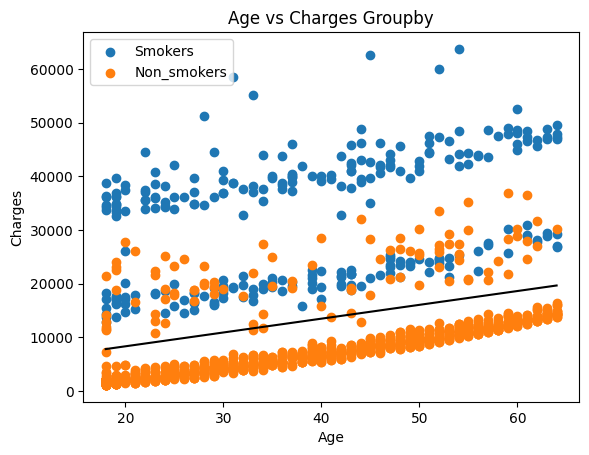

In [31]:
m, b, r, p, err = stats.linregress(df.age, df.charges)
x = range(df.age.min(), df.age.max()+1)
y = m*x + b
plt.plot(x, y, color = 'black')
plt.scatter(df_smoker.age, df_smoker.charges, label='Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label='Non_smokers')
plt.title('Age vs Charges Groupby')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


In [32]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

model = ols(formula='charges ~ age', data=df).fit()

white_test = het_white(model.resid, model.model.exog)

breuc_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value'])

output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = breuc_test

output_df

,LM Statistic,LM-Test p-value,F-Statistic,F-Test p-value
White,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792


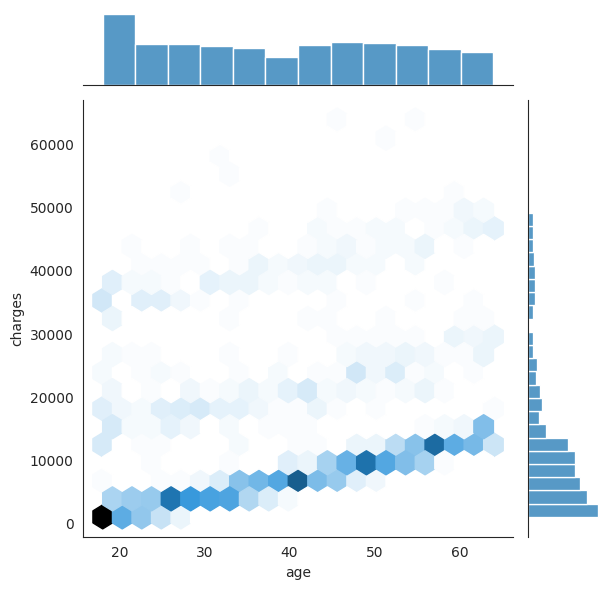

In [33]:
import seaborn as sns

sns.set_style('white')
sns.jointplot(x='age', y='charges', data=df, kind='hex')
plt.show()

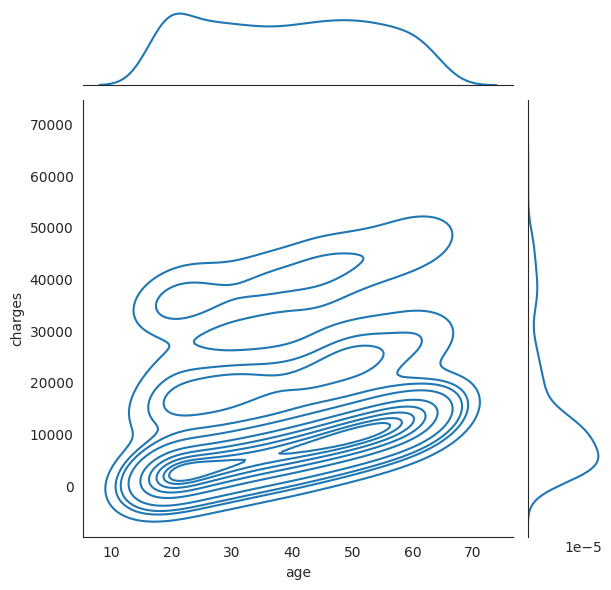

In [34]:
sns.jointplot(x='age', y='charges', data=df, kind='kde')

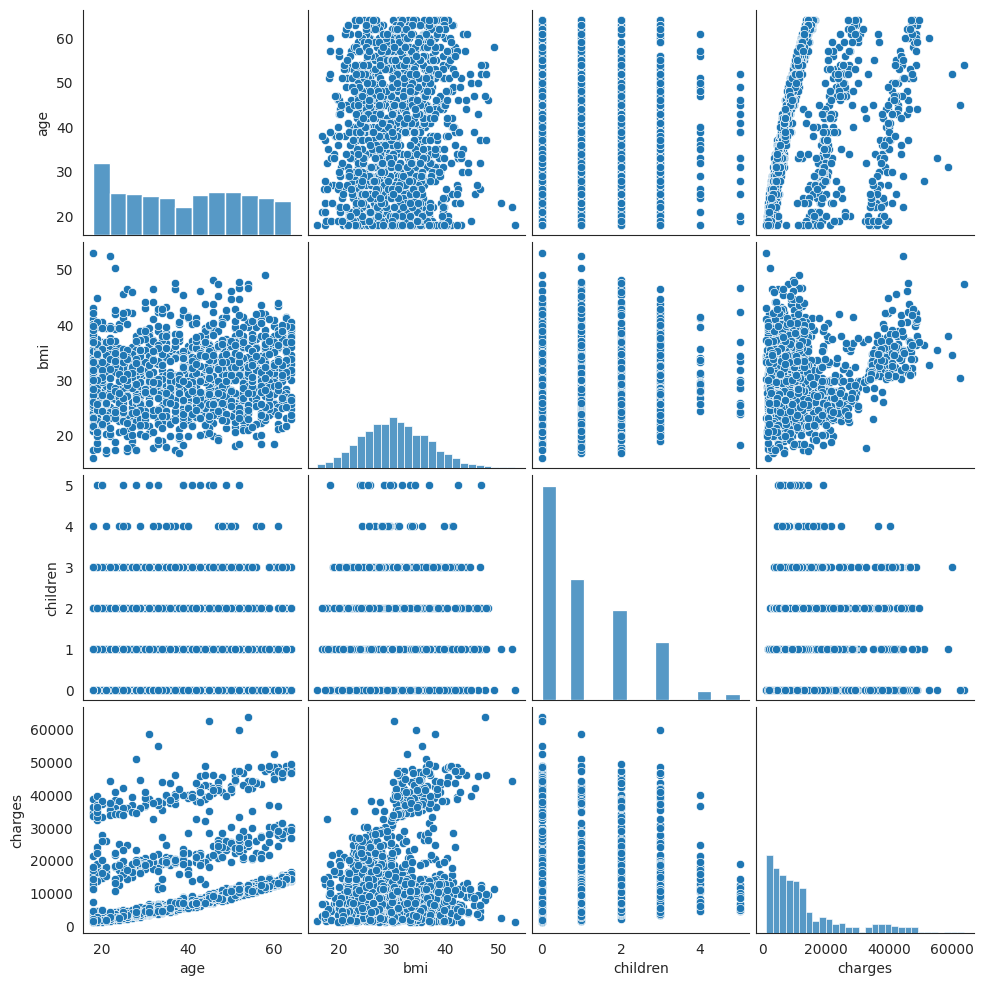

In [35]:
sns.pairplot(df)
plt.show()

In [36]:
import plotly.express as px
fig = px.scatter_3d(df, x='age', y='charges', z='bmi', color='smoker', symbol='sex', size='children')
fig.show()

Anova Test

In [37]:
stats.ttest_ind(df_smoker.charges, df_nonsmoker.charges)

TtestResult(statistic=46.66492117272371, pvalue=8.271435842179102e-283, df=1336.0)

In [38]:
feature = 'smoker'
label = 'charges'

groups = df[feature].unique()
grouped_values = []
for group in groups:
  grouped_values.append(df[df[feature] == group][label])

stats.f_oneway(*grouped_values)

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

In [39]:
feature = 'sex'
label = 'charges'

groups = df[feature].unique()
grouped_values = []
for group in groups:
  grouped_values.append(df[df[feature] == group][label])

stats.f_oneway(*grouped_values)

F_onewayResult(statistic=4.3997016974374565, pvalue=0.03613272100596256)

In [40]:
feature = 'region'
label = 'charges'

groups = df[feature].unique()
grouped_values = []
for group in groups:
  grouped_values.append(df[df[feature] == group][label])

stats.f_oneway(*grouped_values)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)